In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST(root="./data", download=True, train=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST(root="./data", download=True, train=False, transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=8, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=8, shuffle=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!





In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [19]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()

In [20]:
X = torch.rand(28, 28)
X = X.view(-1, 28*28)

In [21]:
output = net(X)
print(output)

tensor([[-2.3790, -2.2704, -2.4087, -2.2830, -2.2005, -2.3362, -2.3644, -2.1989,
         -2.3168, -2.2905]], grad_fn=<LogSoftmaxBackward>)


In [32]:
#train
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS=1


for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)



tensor(0.0614, grad_fn=<NllLossBackward>)


In [57]:
#test

correct=0
total=0

with torch.no_grad():
    for data in testset:
        X, y = data
        predictions = net(X.view(-1, 28*28))
        for idx, prediction in enumerate(predictions):
            if (torch.argmax(prediction)==y[idx]):
                X_false = X[idx]
                y_false = torch.argmax(prediction)
                correct+=1
            else:
                X_false = X[idx]
                prediction_false = torch.argmax(prediction)
                y_false = y[idx]
            total+=1
    print(f"Accuracy: {correct/total*100}%")
    

Accuracy: 96.04%


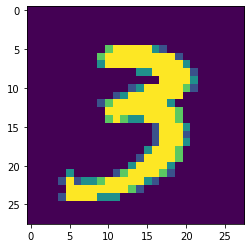

tensor(9)
tensor(3)


In [58]:
#Show time !!

import matplotlib.pyplot as plt

plt.imshow(X_false.view(28, 28))
plt.show()

print(prediction_false)
print(y_false)

#idx=7
#plt.imshow(X[idx].view(28, 28))
#plt.show()
#print(torch.argmax(predictions[idx]))